C:\Users\Hasan\AppData\Local\Temp\ipykernel_8432\2009078361.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1650409285&period2=1681945285&interval=1d&events=history&includeAdjustedClose=true', date_parser=True)


Epoch 1/10
5/5 - 2s - loss: 0.8149 - 2s/epoch - 323ms/step
Epoch 2/10
5/5 - 0s - loss: 0.4591 - 78ms/epoch - 16ms/step
Epoch 3/10
5/5 - 0s - loss: 0.2438 - 69ms/epoch - 14ms/step
Epoch 4/10
5/5 - 0s - loss: 0.2232 - 74ms/epoch - 15ms/step
Epoch 5/10
5/5 - 0s - loss: 0.1721 - 78ms/epoch - 16ms/step
Epoch 6/10
5/5 - 0s - loss: 0.1511 - 66ms/epoch - 13ms/step
Epoch 7/10
5/5 - 0s - loss: 0.1430 - 80ms/epoch - 16ms/step
Epoch 8/10
5/5 - 0s - loss: 0.1298 - 89ms/epoch - 18ms/step
Epoch 9/10
5/5 - 0s - loss: 0.1261 - 75ms/epoch - 15ms/step
Epoch 10/10
5/5 - 0s - loss: 0.1219 - 101ms/epoch - 20ms/step
1/1 [==============================] - 0s 306ms/step - loss: 0.0044
Test loss: 0.004425823222845793
1/1 [==============================] - 0s 309ms/step


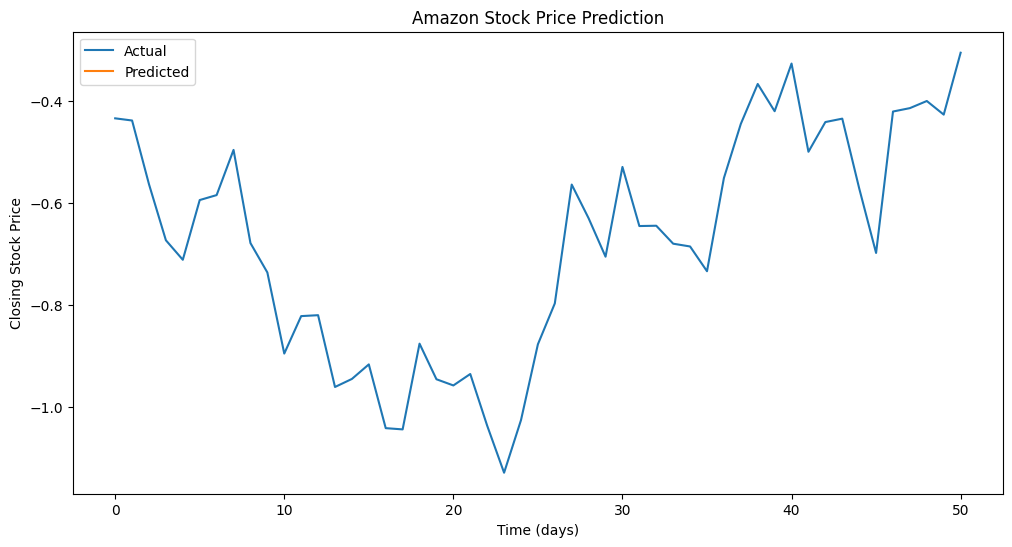

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load stock price data
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1650409285&period2=1681945285&interval=1d&events=history&includeAdjustedClose=true', date_parser=True)
close_prices = data['Close'].values.reshape(-1,1)

# Normalize the data
mean = np.mean(close_prices)
std = np.std(close_prices)
close_prices = (close_prices - mean) / std

# Define function to create input/output sequences for LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and split data into training and testing sets
seq_length = 50
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Create input/output sequences for LSTM model
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


model = tf.keras.Sequential([
    # LSTM layer with 64 units and input shape (seq_length, 1)
    tf.keras.layers.LSTM(64, input_shape=(seq_length, 1)),
    # Dense output layer with 1 unit
    tf.keras.layers.Dense(1)
])

# Compile the model with MSE loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 10 epochs
model.fit(X_train, y_train, epochs=10, verbose=2)
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)


# Evaluate the model on the testing set
test_loss = model.evaluate(X_test, y_test)


# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the actual and predicted values
import matplotlib.pyplot as plt

# Plot actual and predicted closing prices
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()

# Scale the data back to the original range
y_test = (y_test * std) + mean
y_pred = (y_pred * std) + mean
